In [3]:
# libraries imported
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
import keras
 
import matplotlib.pyplot as plt 
%matplotlib inline

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.callbacks import EarlyStopping
from random import shuffle
from IPython.display import display
from PIL import Image

Using TensorFlow backend.


In [12]:
directory = 'D:/MS - BAIS/Spring 2020/DSP/Project/'
TRAIN_DIR = directory+'images/'
TEST_DIR = directory+'predict_images/'
print(directory)
print(TRAIN_DIR)
print(TEST_DIR)

D:/MS - BAIS/Spring 2020/DSP/Project/
D:/MS - BAIS/Spring 2020/DSP/Project/images/
D:/MS - BAIS/Spring 2020/DSP/Project/predict_images/


In [13]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

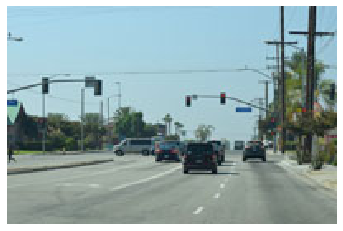

In [14]:
plt.imshow(plt.imread(np.random.choice(train_images)))
plt.axis('off')
plt.show()

In [15]:
# Shuffle all the images available in Training Directory before proceeding further
shuffle(os.listdir(TRAIN_DIR))

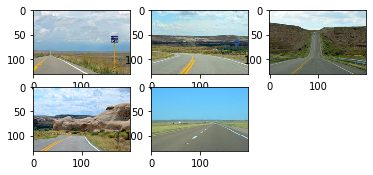

In [18]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = TRAIN_DIR
# plot first few images
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'without-sign1' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

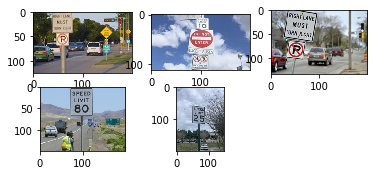

In [20]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = TRAIN_DIR
# plot first few images
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'with-sign' + str(i+10) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [23]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = TRAIN_DIR
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('with-'):
        output = 1.0
    # load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('photos.npy', photos)
save('labels.npy', labels)

(100, 200, 200, 3) (100,)


In [24]:
from numpy import load
photos = load('photos.npy')
labels = load('labels.npy')
print(photos.shape, labels.shape)

(100, 200, 200, 3) (100,)


In [26]:
from os import makedirs
from os import rmdir

import shutil

# create directories
dataset_home = directory+'dataset_with_vs_without/'
if os.path.exists(dataset_home+'train/with-/'):
    shutil.rmtree(dataset_home+'train/with-/')
    shutil.rmtree(dataset_home+'train/without-/')
    shutil.rmtree(dataset_home+'valid/without-/')
    shutil.rmtree(dataset_home+'valid/with-/')
    shutil.rmtree(dataset_home)

In [27]:
from os import makedirs
from os import rmdir
from os import listdir
import shutil
from shutil import copyfile
from random import seed
from random import random
from random import shuffle
# create directories
dataset_home = directory+'dataset_with_vs_without/'
subdirs = ['train/', 'valid/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['with/', 'without/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=False)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories
src_directory = TRAIN_DIR
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'valid/'
    if file.startswith('with-'):
        dst = dataset_home + dst_dir + 'with/'  + file
        copyfile(src, dst)
    elif file.startswith('without-'):
        dst = dataset_home + dst_dir + 'without/'  + file
        copyfile(src, dst)

In [28]:
xavier = keras.initializers.glorot_normal(seed=None)
he = keras.initializers.he_normal(seed=None)


model = Sequential()
# Convolutional layers and Pooling
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
       
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=he, padding='same' ))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(40, (3, 3), activation='relu', kernel_initializer=he, padding='same' ))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(55, (3, 3), activation='relu', kernel_initializer=xavier, padding='same' ))
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())
model.add(Dropout(0.5)) 

# Dense layers using regularizer l2
model.add(Dense(128, activation='relu', kernel_initializer=he,kernel_regularizer=regularizers.l2(0.02)))

# Dense layers
model.add(Dense(200)) #64
model.add(Activation('relu')) 

model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

# Model Summary
model.summary()

# Optimizer
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 40)        11560     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 40)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 55)       

In [29]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  shear_range=0.15,
                                  zoom_range=0.2,
                                  rotation_range=45,
                                  #width_shift_range=[-0.2,0.2],
                                  #height_shift_range=0.25,
                                  brightness_range=[0.5,1.5],
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it = train_datagen.flow_from_directory(directory+'dataset_with_vs_without/train/',
        class_mode='binary', batch_size=10, target_size=(200, 200))

val_it = val_datagen.flow_from_directory(directory+'dataset_with_vs_without/valid/',
        class_mode='binary', batch_size=5, target_size=(200, 200))
print(len(train_it)) # used in steps_per_epoch
print(len(val_it)) # used in validation_steps

Found 84 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
9
4


In [30]:
history = model.fit_generator( train_it,
                         steps_per_epoch=len(train_it),
                         epochs=100,
                         validation_data= val_it,
                         validation_steps= len(val_it))  

Epoch 1/100
9/9 [==============================] - 3s 282ms/step - loss: 3.9424 - accuracy: 0.4524 - val_loss: 2.5236 - val_accuracy: 0.6875
Epoch 2/100
9/9 [==============================] - 2s 221ms/step - loss: 2.0055 - accuracy: 0.5595 - val_loss: 1.4219 - val_accuracy: 0.6875
Epoch 3/100
9/9 [==============================] - 2s 230ms/step - loss: 1.2892 - accuracy: 0.6786 - val_loss: 0.4731 - val_accuracy: 0.8125
Epoch 4/100
9/9 [==============================] - 2s 235ms/step - loss: 0.9810 - accuracy: 0.7500 - val_loss: 0.4990 - val_accuracy: 0.8125
Epoch 5/100
9/9 [==============================] - 2s 251ms/step - loss: 0.7076 - accuracy: 0.8452 - val_loss: 0.5877 - val_accuracy: 0.8125
Epoch 6/100
9/9 [==============================] - 3s 329ms/step - loss: 0.6709 - accuracy: 0.7976 - val_loss: 0.1970 - val_accuracy: 0.8750
Epoch 7/100
9/9 [==============================] - 3s 323ms/step - loss: 0.6085 - accuracy: 0.8452 - val_loss: 0.3132 - val_accuracy: 0.8125
Epoch 8/100
9

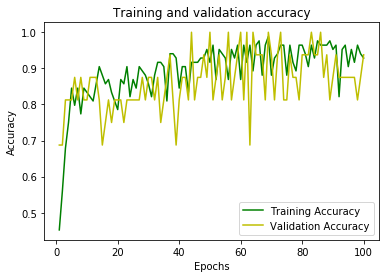

In [31]:
plt.clf()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'y', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

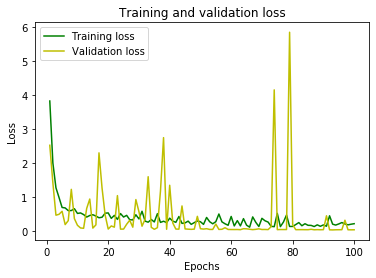

In [32]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
# Load the data for making predictions
test_datagen = ImageDataGenerator(rescale = 1./255)
prediction_set = test_datagen.flow_from_directory(TEST_DIR, # relative path from working directoy
                                            target_size = (200, 200),batch_size=1,
                                            class_mode = 'binary')
predictions=model.predict(prediction_set)

Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 4, but the Sequence has length 0